# Lab 2 - Analysis of Skin Cancer Gene Expression Data
***
Author: Nidhi Soley
<br>
Lab 2, BME 6770
<br>
Data Description-
Project: TCGA-SKCM
<br>
Primary Site: Skin (Melanoma Skin Cancer)
<br>
Data Category: Transcriptome profiling
<br>
Dat Type: Gene Expression Quantification
<br>
Experiment Strategy: RNA sequence
<br>
Workflow Type: HT-seq COUNTS
<br>
Number of Patients: 472
<br>
This code analyzes skin cancer gene expression data. It imports the data from a CSV file created by unzippinf all the HT-seq counts files. It computes and visualizes the SVD of the data. Interpret data based upon its SVD.There are two different approaches used for preprocessing and sorting the data and for assessing the statistical significance of the interpretation.It also creates gene lists for analysis in GOrilla.

## Importing data and modules
***
Import needed modules

In [2]:
import sys
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statistics

Read the gene expression data from a csv file, the data does not has genes that did not had significant value. Hence the number of genes is reduced to 15179.

In [3]:
path_data = "C:\\Users\\nidhi\\Desktop\\Complete-Python-3-Bootcamp-master\\SELF DONE\\data set\\NEWDATA.csv"
df = pd.read_csv(path_data)
df

,Gene Expression,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000186854,ENSG00000186862,ENSG00000186866,ENSG00000186867,ENSG00000186868,ENSG00000186871,ENSG00000186889,ENSG00000186891,gender,ethnicity
0,57882f61-4a32-49f1-afd4-61c70b184d8b,0,908,944,947,620,1648,3653,2119,3408,...,259,135,1143,0,1275,201,272,162,male,not hispanic or latino
1,e85c07ed-51ef-4c91-8431-0dc738d9ccc6,0,1823,413,400,237,1098,6650,693,1644,...,3678,48,1848,0,43,369,341,12,female,not hispanic or latino
2,bd2345ed-33b8-4010-8479-4d6c67e29561,0,2483,1182,932,731,5220,11582,2207,3061,...,414,118,3324,0,113,832,233,201,male,not hispanic or latino
3,536e1779-550b-47f1-a204-50a16870a8e1,0,967,684,324,291,1283,3976,1903,1811,...,53,86,1995,0,152,130,423,171,female,not hispanic or latino
4,fdbbdbf8-cf2e-4550-9727-b023aed9b8d9,0,1686,639,689,2117,2231,7648,1635,2213,...,88,133,4120,6,58,467,474,312,male,not hispanic or latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0eb0b477-1c7a-4416-895a-ea6463dbe847,159,635,379,164,699,3618,1798,1250,933,...,116,59,787,8,754,41,164,241,male,not hispanic or latino
468,7b4bcf0e-ec55-489b-870f-a4360a6bea2f,229,1330,737,259,472,45782,3438,686,2048,...,211,75,4247,5,234,37,353,106,male,not hispanic or latino
469,3b62e38c-d473-4329-86ab-5d4977f92b09,939,1106,974,840,467,13675,2049,1514,4198,...,60,77,3551,10,186,250,155,123,female,not hispanic or latino
470,d6283ab0-9019-4ad2-93aa-2e6b39cd9641,3915,2302,1200,1348,1251,3673,4234,2430,5054,...,72,117,3816,0,818,936,110,162,male,not hispanic or latino


The first preprocessing technique- HT-seq Counts.
<br>
Using the code we do second preprocessing of the data i.e. dropping the unwated and non numeric columns and rows for the calculation of SVD.
<br>
First we drop the first column with non numeric values.


In [4]:
df_cleaned = df.drop(['Gene Expression'], axis=1)
df_cleaned

,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000186854,ENSG00000186862,ENSG00000186866,ENSG00000186867,ENSG00000186868,ENSG00000186871,ENSG00000186889,ENSG00000186891,gender,ethnicity
0,0,908,944,947,620,1648,3653,2119,3408,1215,...,259,135,1143,0,1275,201,272,162,male,not hispanic or latino
1,0,1823,413,400,237,1098,6650,693,1644,383,...,3678,48,1848,0,43,369,341,12,female,not hispanic or latino
2,0,2483,1182,932,731,5220,11582,2207,3061,1861,...,414,118,3324,0,113,832,233,201,male,not hispanic or latino
3,0,967,684,324,291,1283,3976,1903,1811,861,...,53,86,1995,0,152,130,423,171,female,not hispanic or latino
4,0,1686,639,689,2117,2231,7648,1635,2213,2605,...,88,133,4120,6,58,467,474,312,male,not hispanic or latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,159,635,379,164,699,3618,1798,1250,933,561,...,116,59,787,8,754,41,164,241,male,not hispanic or latino
468,229,1330,737,259,472,45782,3438,686,2048,1172,...,211,75,4247,5,234,37,353,106,male,not hispanic or latino
469,939,1106,974,840,467,13675,2049,1514,4198,362,...,60,77,3551,10,186,250,155,123,female,not hispanic or latino
470,3915,2302,1200,1348,1251,3673,4234,2430,5054,806,...,72,117,3816,0,818,936,110,162,male,not hispanic or latino


Second we drop the last two columns-gender and ethnicity, that have non numberic data. Reducing the number of columns from 15179  to 15177

In [5]:
gender_col = df_cleaned.columns.get_loc("gender")
gender_col

15177

In [6]:
data = df_cleaned.iloc[:,0:gender_col]
data.shape #patients-472 and the gene expression-15177

(472, 15177)

Visualizing the dataset

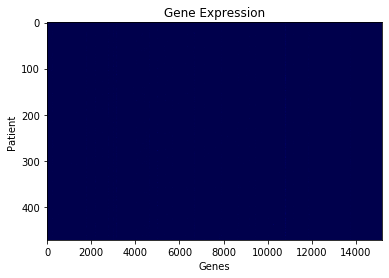

In [7]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)

ax.imshow(data, cmap = 'seismic')
ax.set_title("Gene Expression")
ax.set_ylabel('Patient')
ax.set_xlabel('Genes')
ax.set_aspect('auto')
plt.show()

## Computing the SVD


In [31]:
u, s, v = np.linalg.svd(data, full_matrices=False)
S=np.diag(s)
u.shape


(472, 472)

Visualizing U, Vtranspose, and Sigma

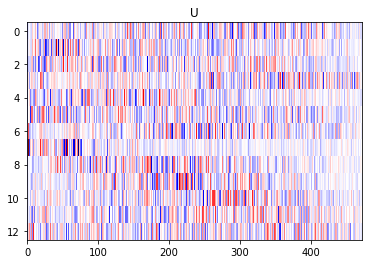

In [48]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.imshow(u[: 13], cmap = 'seismic')
ax.set_title("U")
ax.set_aspect('auto')
plt.show()

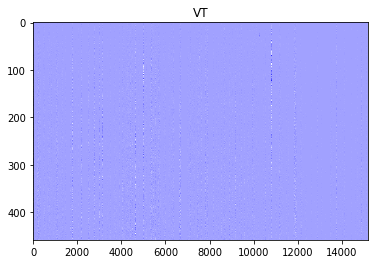

In [55]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.imshow(v[13 :], cmap = 'seismic')
ax.set_title("VT")
ax.set_aspect('auto')
plt.show()


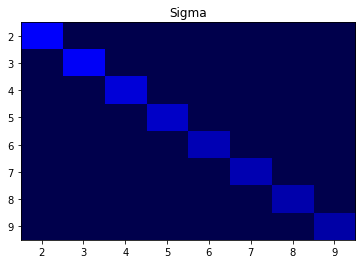

In [53]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)

ax.imshow(S[: 13], cmap = 'seismic')
ax.set_aspect('auto')
ax.set_title("Sigma")
#ax.set_aspect('auto')
ax.set_xlim ([1.5,9.5]) 
ax.set_ylim ([9.5,1.5]) 

plt.show()

## SVD Check
Checking if the SVD computed is correct or not by comparing reconstruted SVD and the original data. The result is True.

In [12]:
#sigma = np.diag(s)
u.shape, s.shape, v.shape
reconstructed = np.dot(u * s, v[:472, :]);
np.allclose(data, reconstructed)

True

## Aalysis with the labels.
#### 1. Male-Female pattern analysis

Diving the males and females in two groups. Group 1 is females and Group 2 is males

In [13]:
# Get all indices of female patients
group_1 = df_cleaned.index[df_cleaned['gender']=='female'].tolist()

# Make a set with all patients
all_patients = set(range(0,df_cleaned.shape[0]))

def getGroup_2(group_1):
    # turn into a set because it makes it easier to code
    group_1_set = set(group_1)

    # Make a set with all patients
    all_patients = set(range(0,df_cleaned.shape[0]))

    # Make a set with all patients that are not in group 1
    group_2_set = all_patients.difference(group_1_set)

    # check to ensure that no patients have been dropped.
    #print(len(all_patients) == len(group_1_set) + len(group_2_set))

    group_2 = list(group_2_set)
    return group_2

group_2 = getGroup_2(group_1)

Checking if we split the two correctly by calculating the length of the two groups.
<br>
Number of Males are 288
<br>
Number of Females are 184

In [14]:
group_2
len(group_2)

288

In [15]:
len(group_1)

184

### Statistical Analysis
The pattern is statistically analysed to find the p-value using two methods:
1. Mann-Whitney-Wilcoxin Test
2. Hypergeometric Distribution
<br>

#### Mann-Whitney-Wilcoxin Test

In [44]:
# Start with the highest value of sigma

def findSignificantPatterns(group_1, group_2):
    sigma_max = s[2]

    # make a list to store significant patterns
    sig = list()

    # Loop through all patterns with a sigma value that is greater than 1/4 of the highest sigma value.
    i = 0;
    while s[i] > sigma_max * .25:
        # get the values for both groups
        group_1_values = u[group_1,i];
        group_2_values = u[group_2,i];
        i = i+1

        # run a mann-whitney-wilcoxin test to see if the groups are significantly differnt
        result = stats.mannwhitneyu(group_1_values, group_2_values)

        # if the groups aren't significant we don't care about them
        if result.pvalue > 0.05:
            continue

        # print the significant groups and store the patterns for later
        was_nt = "was" if result.pvalue < 0.05 else "wasn't"
        sig.append(i)
        print('For pattern ' + str(i) + ' in u the p-value was ' + str(result.pvalue) + " which " + was_nt + " significant.")
    return sig
sig = findSignificantPatterns(group_1, group_2)

For pattern 13 in u the p-value was 0.007984879770652669 which was significant.
For pattern 21 in u the p-value was 0.02245344535923422 which was significant.


#### Making box plot for the significant pattern

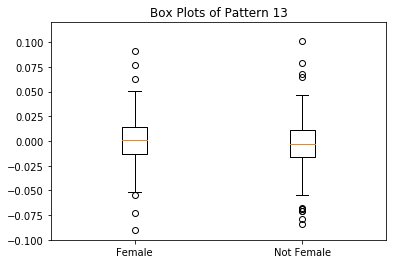

In [17]:
def boxPlotSigFigures(group_1, group_2, sig):
    for pattern_to_plot in sig:
        box_plot_fig, box_plot_ax = plt.subplots();
        box_plot_ax.set_title('Box Plots of Pattern ' + str(pattern_to_plot));
        box_data = [u[group_1,pattern_to_plot], u[group_2,pattern_to_plot]];
        box_plot_ax.boxplot(box_data, labels=['Female', 'Not Female']);        
        box_plot_ax.set_ylim(-0.10,0.12)

boxPlotSigFigures(group_1, group_2, sig)

#### Hypergeometric Distribution

In [18]:
def FindSignificantWithHyperGeometric(sig, group_1, threshold):
    for pattern_to_check in sig:
        # the threshold can be changed to the median, mean or the median + 1 stdev but it's all insignificant 
        # The convention in python for hypergeometric is that M = total number of objects, n is total number of type 1 objects,
        # N the total number of successes, and x the number of successes of type 1.
        # get total number above threshold
        N = (u[:,pattern_to_check] > threshold).sum()

        # get the total number of choices
        M = len(all_patients)

        # get the number of items in group 1
        n = len(group_1)

        # get the number of items in group 1 above the threshold
        x = (u[group_1, pattern_to_check] > threshold).sum()

        print(threshold, x, M, n, N)
        print("Pattern " + str(pattern_to_check) + ": p-value=" + str(1 - stats.hypergeom.cdf(x, M, n, N)))
FindSignificantWithHyperGeometric(sig, group_1, 0)

0 93 472 184 216
Pattern 13: p-value=0.03914753426337603


The p-values are smaller than 0.05 hence we can reject the null hypothesis that there is no difference between the male and female population with skin cancer.


Below is a plot of the first significant pattern, sorted and unsorted

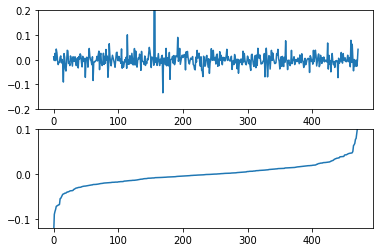

In [19]:
def plotSortedPattern(p):
    x = u[:,p].copy()
    figsort,axs = plt.subplots(2)
    axs[0].plot(x)
    x.sort()
    axs[1].plot(x)
    axs[0].set_ylim([-0.2, 0.2])
    axs[1].set_ylim([-0.12, 0.1])
    


    plt.show()
    
plotSortedPattern(13)


### Interpreting the data
We now interpret the data. The gene expression of the identified pattern above is put in GOrilla. This is done by sorting the genes both ascending and descending orders.
<br>
Making list of genes for the specific pattern in descending order.

In [20]:
## pattern selection
patternToPrint = 1;

def printGeneExpression(patternToPrint):
    genes = list()
    expression = list()
    # make two lists with all of the protein names and the associated expression
    for i in range(0, len(data.columns)):
        genes.append(data.columns[i])
        expression.append(v[patternToPrint,:][i])
        #print(str(proteinToGene[data.columns[i]]) + ' ' + str(v[patternToPrint,:][i]))

    # turn the lists into a dataframe
    d = {'gene':genes, 'expression':expression}
    patternExpression = pd.DataFrame(d, columns=['gene','expression'])
    
    #We then sort the genes by the expression value
    pattern = patternExpression.sort_values(by=['expression'],ignore_index=True, ascending=False)
    
    # We then print that list in order of expression so we can copy-paste into gorilla
    for gene in pattern.iloc[:,0]:
        print(gene)
        
            

printGeneExpression(13) 

ENSG00000173546
ENSG00000107165
ENSG00000175899
ENSG00000128564
ENSG00000140391
ENSG00000184009
ENSG00000159167
ENSG00000128342
ENSG00000087086
ENSG00000106624
ENSG00000075624
ENSG00000108821
ENSG00000130203
ENSG00000103855
ENSG00000076706
ENSG00000137818
ENSG00000169410
ENSG00000100994
ENSG00000115414
ENSG00000161016
ENSG00000106397
ENSG00000169710
ENSG00000137575
ENSG00000103888
ENSG00000140374
ENSG00000136235
ENSG00000100097
ENSG00000135404
ENSG00000077498
ENSG00000120215
ENSG00000160932
ENSG00000160789
ENSG00000096384
ENSG00000160678
ENSG00000130429
ENSG00000128595
ENSG00000103257
ENSG00000163399
ENSG00000100345
ENSG00000034510
ENSG00000167526
ENSG00000106211
ENSG00000132386
ENSG00000084207
ENSG00000164111
ENSG00000159840
ENSG00000167196
ENSG00000100316
ENSG00000140382
ENSG00000167996
ENSG00000178209
ENSG00000071127
ENSG00000041982
ENSG00000105835
ENSG00000118257
ENSG00000147403
ENSG00000070756
ENSG00000140105
ENSG00000109971
ENSG00000026508
ENSG00000169100
ENSG00000177971
ENSG0000

ENSG00000182950
ENSG00000118900
ENSG00000135622
ENSG00000183117
ENSG00000082146
ENSG00000160741
ENSG00000104805
ENSG00000158792
ENSG00000132600
ENSG00000153443
ENSG00000099910
ENSG00000072501
ENSG00000136448
ENSG00000176108
ENSG00000143258
ENSG00000182551
ENSG00000167770
ENSG00000160446
ENSG00000122490
ENSG00000166337
ENSG00000107175
ENSG00000149591
ENSG00000031081
ENSG00000131069
ENSG00000062598
ENSG00000107186
ENSG00000143437
ENSG00000170271
ENSG00000112679
ENSG00000167716
ENSG00000027847
ENSG00000139116
ENSG00000013563
ENSG00000099995
ENSG00000026950
ENSG00000113716
ENSG00000105327
ENSG00000167363
ENSG00000068001
ENSG00000137193
ENSG00000143376
ENSG00000182636
ENSG00000155363
ENSG00000100083
ENSG00000139197
ENSG00000067177
ENSG00000164967
ENSG00000104549
ENSG00000063587
ENSG00000139613
ENSG00000071539
ENSG00000176022
ENSG00000072506
ENSG00000128052
ENSG00000105245
ENSG00000165238
ENSG00000083444
ENSG00000113504
ENSG00000040633
ENSG00000068354
ENSG00000162738
ENSG00000137133
ENSG0000

ENSG00000094914
ENSG00000176182
ENSG00000038358
ENSG00000144580
ENSG00000101473
ENSG00000107371
ENSG00000119787
ENSG00000144741
ENSG00000132591
ENSG00000133460
ENSG00000107281
ENSG00000180901
ENSG00000104231
ENSG00000158813
ENSG00000172986
ENSG00000141504
ENSG00000142185
ENSG00000128604
ENSG00000186185
ENSG00000066777
ENSG00000038382
ENSG00000157869
ENSG00000163636
ENSG00000138777
ENSG00000143315
ENSG00000173166
ENSG00000123364
ENSG00000178096
ENSG00000119630
ENSG00000166169
ENSG00000164951
ENSG00000137809
ENSG00000171443
ENSG00000014919
ENSG00000147592
ENSG00000105609
ENSG00000141293
ENSG00000163162
ENSG00000167186
ENSG00000099219
ENSG00000102103
ENSG00000080709
ENSG00000162976
ENSG00000182173
ENSG00000179965
ENSG00000104983
ENSG00000051523
ENSG00000119711
ENSG00000124731
ENSG00000121064
ENSG00000105568
ENSG00000099822
ENSG00000174446
ENSG00000133398
ENSG00000126091
ENSG00000012174
ENSG00000176715
ENSG00000137135
ENSG00000119772
ENSG00000163040
ENSG00000170266
ENSG00000153060
ENSG0000

ENSG00000172828
ENSG00000174327
ENSG00000164048
ENSG00000130762
ENSG00000101082
ENSG00000139974
ENSG00000162782
ENSG00000147437
ENSG00000171798
ENSG00000110801
ENSG00000180389
ENSG00000150787
ENSG00000160447
ENSG00000125246
ENSG00000168411
ENSG00000167595
ENSG00000167549
ENSG00000110888
ENSG00000129219
ENSG00000116273
ENSG00000182591
ENSG00000124507
ENSG00000130957
ENSG00000133519
ENSG00000145757
ENSG00000184441
ENSG00000166317
ENSG00000174652
ENSG00000112624
ENSG00000167525
ENSG00000174483
ENSG00000178935
ENSG00000013561
ENSG00000000460
ENSG00000149609
ENSG00000133661
ENSG00000172482
ENSG00000165943
ENSG00000149927
ENSG00000123965
ENSG00000173557
ENSG00000118160
ENSG00000135638
ENSG00000164604
ENSG00000072952
ENSG00000042781
ENSG00000140548
ENSG00000130477
ENSG00000130881
ENSG00000156170
ENSG00000164989
ENSG00000158079
ENSG00000160460
ENSG00000162755
ENSG00000170956
ENSG00000165269
ENSG00000167862
ENSG00000073737
ENSG00000101898
ENSG00000096088
ENSG00000159761
ENSG00000117560
ENSG0000

ENSG00000176320
ENSG00000070985
ENSG00000129204
ENSG00000113396
ENSG00000183154
ENSG00000183251
ENSG00000184210
ENSG00000183542
ENSG00000126218
ENSG00000164556
ENSG00000173811
ENSG00000186188
ENSG00000176884
ENSG00000143869
ENSG00000111262
ENSG00000175267
ENSG00000173578
ENSG00000144460
ENSG00000119723
ENSG00000163632
ENSG00000186474
ENSG00000174015
ENSG00000172995
ENSG00000131126
ENSG00000186310
ENSG00000184845
ENSG00000176659
ENSG00000134398
ENSG00000167414
ENSG00000111364
ENSG00000168010
ENSG00000181656
ENSG00000177692
ENSG00000127366
ENSG00000137878
ENSG00000166159
ENSG00000166343
ENSG00000167378
ENSG00000172476
ENSG00000178449
ENSG00000135423
ENSG00000178734
ENSG00000184905
ENSG00000179362
ENSG00000177757
ENSG00000116783
ENSG00000086506
ENSG00000184856
ENSG00000165606
ENSG00000179799
ENSG00000155926
ENSG00000163424
ENSG00000105982
ENSG00000128271
ENSG00000182870
ENSG00000120210
ENSG00000124334
ENSG00000132915
ENSG00000182557
ENSG00000143167
ENSG00000168852
ENSG00000179057
ENSG0000

ENSG00000143889
ENSG00000171462
ENSG00000163092
ENSG00000078808
ENSG00000160654
ENSG00000151748
ENSG00000169635
ENSG00000105792
ENSG00000060982
ENSG00000122188
ENSG00000135482
ENSG00000171735
ENSG00000176371
ENSG00000164265
ENSG00000131849
ENSG00000137185
ENSG00000159650
ENSG00000181544
ENSG00000162366
ENSG00000170412
ENSG00000152763
ENSG00000152061
ENSG00000049247
ENSG00000100060
ENSG00000100908
ENSG00000151967
ENSG00000147421
ENSG00000164440
ENSG00000158164
ENSG00000081853
ENSG00000075651
ENSG00000169548
ENSG00000010318
ENSG00000162373
ENSG00000182247
ENSG00000172954
ENSG00000178075
ENSG00000170473
ENSG00000143727
ENSG00000042317
ENSG00000170919
ENSG00000148459
ENSG00000173064
ENSG00000185274
ENSG00000120328
ENSG00000130940
ENSG00000131668
ENSG00000102390
ENSG00000120029
ENSG00000178662
ENSG00000139531
ENSG00000132680
ENSG00000147689
ENSG00000126746
ENSG00000011132
ENSG00000153107
ENSG00000164610
ENSG00000112983
ENSG00000142677
ENSG00000180178
ENSG00000082482
ENSG00000111412
ENSG0000

ENSG00000166592
ENSG00000156110
ENSG00000155307
ENSG00000077264
ENSG00000184005
ENSG00000005102
ENSG00000155744
ENSG00000123500
ENSG00000087494
ENSG00000119718
ENSG00000135241
ENSG00000125430
ENSG00000151304
ENSG00000175906
ENSG00000110906
ENSG00000051825
ENSG00000004961
ENSG00000147679
ENSG00000175197
ENSG00000020426
ENSG00000156113
ENSG00000136935
ENSG00000064687
ENSG00000086712
ENSG00000162885
ENSG00000152049
ENSG00000096717
ENSG00000158186
ENSG00000162630
ENSG00000081014
ENSG00000129911
ENSG00000185219
ENSG00000167695
ENSG00000179630
ENSG00000050748
ENSG00000113494
ENSG00000087338
ENSG00000184898
ENSG00000010072
ENSG00000165632
ENSG00000159459
ENSG00000163006
ENSG00000156876
ENSG00000070778
ENSG00000124253
ENSG00000104897
ENSG00000118058
ENSG00000082438
ENSG00000124813
ENSG00000149295
ENSG00000104154
ENSG00000075043
ENSG00000165246
ENSG00000169641
ENSG00000129158
ENSG00000172059
ENSG00000136819
ENSG00000112146
ENSG00000184677
ENSG00000156711
ENSG00000065320
ENSG00000142556
ENSG0000

ENSG00000116731
ENSG00000173545
ENSG00000102606
ENSG00000146373
ENSG00000134775
ENSG00000075711
ENSG00000163029
ENSG00000077009
ENSG00000164442
ENSG00000114439
ENSG00000155827
ENSG00000095209
ENSG00000108578
ENSG00000134755
ENSG00000111860
ENSG00000066557
ENSG00000157107
ENSG00000134108
ENSG00000151116
ENSG00000089050
ENSG00000127616
ENSG00000109586
ENSG00000039139
ENSG00000154127
ENSG00000142910
ENSG00000140807
ENSG00000107819
ENSG00000172269
ENSG00000149269
ENSG00000174059
ENSG00000144635
ENSG00000154080
ENSG00000114857
ENSG00000152219
ENSG00000144357
ENSG00000174021
ENSG00000112996
ENSG00000131686
ENSG00000168646
ENSG00000151135
ENSG00000116752
ENSG00000172867
ENSG00000092969
ENSG00000151690
ENSG00000152492
ENSG00000127663
ENSG00000115128
ENSG00000135837
ENSG00000051620
ENSG00000138433
ENSG00000180488
ENSG00000099622
ENSG00000186472
ENSG00000021574
ENSG00000132205
ENSG00000155962
ENSG00000168137
ENSG00000083535
ENSG00000119801
ENSG00000157734
ENSG00000163823
ENSG00000126856
ENSG0000

Pasting the above list into GOrilla we get the following results for process. 
<br>
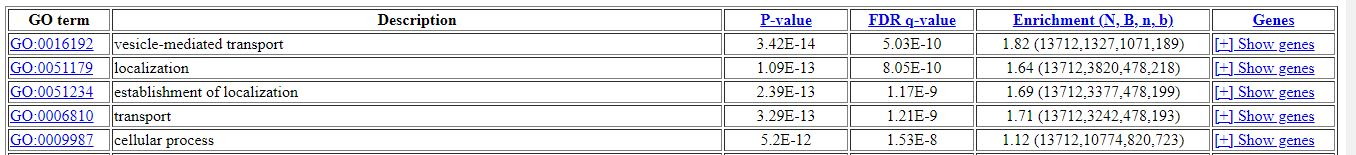
The most relevat is the vesicle mediated transport process. So we can posit that females with Skin cancer over express genes involved in the vesicle mediated transport compared to males

Making list of genes for the specific pattern in ascending order.

In [21]:
## pattern selection
patternToPrint = 1;

def printGeneExpression(patternToPrint):
    genes = list()
    expression = list()
    # make two lists with all of the protein names and the associated expression
    for i in range(0, len(data.columns)):
        genes.append(data.columns[i])
        expression.append(v[patternToPrint,:][i])
        #print(str(proteinToGene[data.columns[i]]) + ' ' + str(v[patternToPrint,:][i]))

    # turn the lists into a dataframe
    d = {'gene':genes, 'expression':expression}
    patternExpression = pd.DataFrame(d, columns=['gene','expression'])
    
    #We then sort the genes by the expression value
    pattern = patternExpression.sort_values(by=['expression'],ignore_index=True, ascending=True)
    
    # We then print that list in order of expression so we can copy-paste into gorilla
    for gene in pattern.iloc[:,0]:
        print(gene)
        
            
#printGeneExpression(13)-->gives list of gene expression

Pasting the above list into GOrilla we get the following results for process. 
<br>
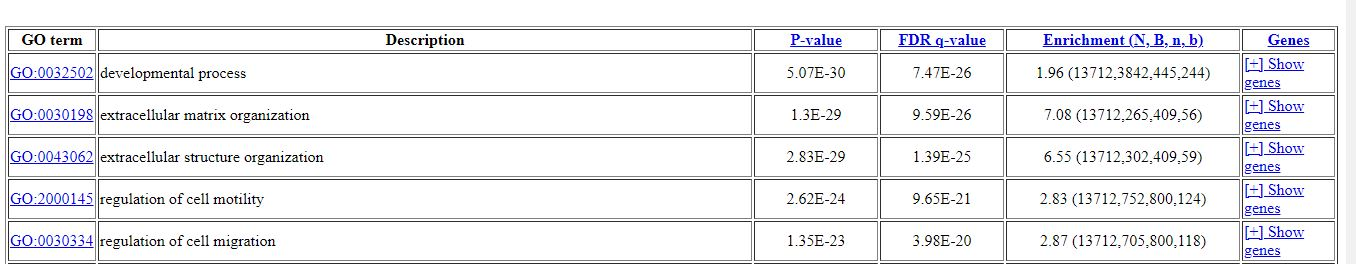
The most relevat is developmental process. So we can posit that females with Skin cancer under express genes involved in the developmental process compared to males

#### 2. Pattern analysis based on the ethnicity label- hispanic or latino/not hispanic or latino
<br>
Performing the same statistal tests as above and then interpreting using GOrilla.

Diving hispanic or latino and not hispanic or latino in two groups

In [22]:
hispanic_or_latino_group = df_cleaned.index[df_cleaned['ethnicity']=='hispanic or latino'].tolist()
not_hispanic_or_latino_group = getGroup_2(hispanic_or_latino_group)


#### Mann-Whitney-Wilcoxin Test

In [56]:
ethnicity = findSignificantPatterns(hispanic_or_latino_group,not_hispanic_or_latino_group)

For pattern 2 in u the p-value was 0.04445931091647646 which was significant.
For pattern 17 in u the p-value was 0.003671656453659074 which was significant.
For pattern 21 in u the p-value was 0.0018814240645924957 which was significant.


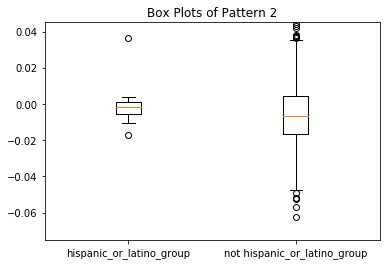

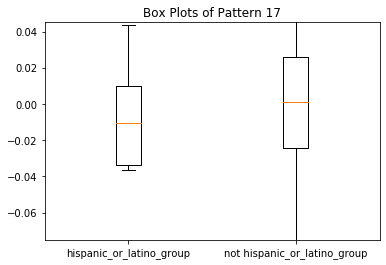

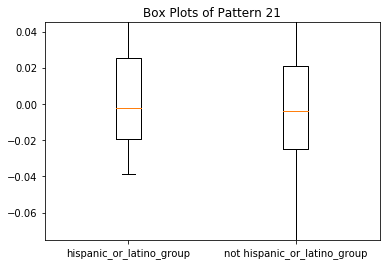

In [57]:
def boxPlotSigFigures(group_1, group_2, sig):
    for pattern_to_plot in sig:
        box_plot_fig, box_plot_ax = plt.subplots();
        box_plot_ax.set_title('Box Plots of Pattern ' + str(pattern_to_plot));
        box_data = [u[group_1,pattern_to_plot], u[group_2,pattern_to_plot]];
        box_plot_ax.boxplot(box_data, labels=['hispanic_or_latino_group', 'not hispanic_or_latino_group']);        
        box_plot_ax.set_ylim(-0.075,0.045)
boxPlotSigFigures(hispanic_or_latino_group,not_hispanic_or_latino_group,ethnicity)

#### Hypergeometric Distribution

In [58]:
FindSignificantWithHyperGeometric(ethnicity,hispanic_or_latino_group,-0.005)

-0.005 8 472 12 209
Pattern 2: p-value=0.03008399745620871
-0.005 5 472 12 268
Pattern 17: p-value=0.7817942386148466
-0.005 6 472 12 244
Pattern 21: p-value=0.43283538079386386


Below is a plot of the first significant pattern, sorted and unsorted

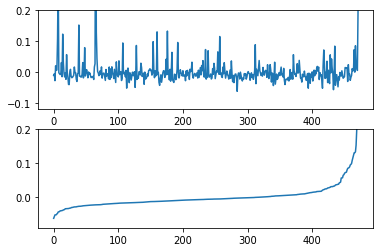

In [26]:
def plotSortedPattern(p):
    x = u[:,p].copy()
    figsort,axs = plt.subplots(2)
    axs[0].plot(x)
    x.sort()
    axs[1].plot(x)
    axs[0].set_ylim([-0.12, 0.2])
    axs[1].set_ylim([-0.09, 0.2])
    


    plt.show()
    
plotSortedPattern(2)


### Interpreting the data
We now interpret the data. The gene expression of the identified pattern above is put in GOrilla. This is done by sorting the genes both ascending and descending orders.
<br>
Making list of genes for the specific pattern in descending order.

In [59]:
## pattern selection
patternToPrint = 1;

def printGeneExpression(patternToPrint):
    genes = list()
    expression = list()
    # make two lists with all of the protein names and the associated expression
    for i in range(0, len(data.columns)):
        genes.append(data.columns[i])
        expression.append(v[patternToPrint,:][i])
        #print(str(proteinToGene[data.columns[i]]) + ' ' + str(v[patternToPrint,:][i]))

    # turn the lists into a dataframe
    d = {'gene':genes, 'expression':expression}
    patternExpression = pd.DataFrame(d, columns=['gene','expression'])
    
    #We then sort the genes by the expression value
    pattern = patternExpression.sort_values(by=['expression'],ignore_index=True, ascending=False)
    
    # We then print that list in order of expression so we can copy-paste into gorilla
    for gene in pattern.iloc[:,0]:
        print(gene)
        
            

printGeneExpression(2)

ENSG00000186847
ENSG00000186832
ENSG00000128422
ENSG00000108821
ENSG00000186081
ENSG00000185479
ENSG00000170465
ENSG00000164692
ENSG00000087086
ENSG00000163220
ENSG00000175793
ENSG00000075624
ENSG00000167768
ENSG00000168542
ENSG00000186395
ENSG00000019582
ENSG00000124102
ENSG00000143546
ENSG00000169469
ENSG00000164733
ENSG00000142173
ENSG00000173801
ENSG00000142156
ENSG00000115414
ENSG00000117984
ENSG00000143556
ENSG00000163359
ENSG00000161249
ENSG00000096696
ENSG00000165474
ENSG00000081277
ENSG00000106211
ENSG00000124466
ENSG00000137699
ENSG00000112378
ENSG00000115884
ENSG00000115461
ENSG00000163191
ENSG00000178363
ENSG00000160213
ENSG00000178372
ENSG00000100345
ENSG00000067225
ENSG00000084207
ENSG00000165272
ENSG00000030582
ENSG00000100097
ENSG00000113140
ENSG00000105141
ENSG00000169474
ENSG00000182492
ENSG00000130635
ENSG00000124107
ENSG00000120708
ENSG00000149925
ENSG00000134871
ENSG00000142669
ENSG00000163207
ENSG00000172757
ENSG00000087245
ENSG00000034510
ENSG00000182718
ENSG0000

ENSG00000105556
ENSG00000110057
ENSG00000165025
ENSG00000087266
ENSG00000060138
ENSG00000184967
ENSG00000172236
ENSG00000103326
ENSG00000173540
ENSG00000177374
ENSG00000132031
ENSG00000101400
ENSG00000170909
ENSG00000145649
ENSG00000182446
ENSG00000140691
ENSG00000165102
ENSG00000127666
ENSG00000025434
ENSG00000134668
ENSG00000085514
ENSG00000129437
ENSG00000116670
ENSG00000071889
ENSG00000183876
ENSG00000171236
ENSG00000141934
ENSG00000034971
ENSG00000132965
ENSG00000149257
ENSG00000151617
ENSG00000105122
ENSG00000113555
ENSG00000123500
ENSG00000129559
ENSG00000116863
ENSG00000107829
ENSG00000140022
ENSG00000101199
ENSG00000130558
ENSG00000177989
ENSG00000178445
ENSG00000138271
ENSG00000172005
ENSG00000052802
ENSG00000133612
ENSG00000122390
ENSG00000075399
ENSG00000157837
ENSG00000165905
ENSG00000157870
ENSG00000105612
ENSG00000117399
ENSG00000172831
ENSG00000060718
ENSG00000141738
ENSG00000169245
ENSG00000160791
ENSG00000128805
ENSG00000132432
ENSG00000133574
ENSG00000158552
ENSG0000

ENSG00000174945
ENSG00000101425
ENSG00000099365
ENSG00000160563
ENSG00000100433
ENSG00000100341
ENSG00000160439
ENSG00000164393
ENSG00000130307
ENSG00000159214
ENSG00000134574
ENSG00000167641
ENSG00000162105
ENSG00000139549
ENSG00000081052
ENSG00000162975
ENSG00000164430
ENSG00000132849
ENSG00000180616
ENSG00000119574
ENSG00000117091
ENSG00000175352
ENSG00000169218
ENSG00000167523
ENSG00000174292
ENSG00000064545
ENSG00000163600
ENSG00000159618
ENSG00000126353
ENSG00000171853
ENSG00000144681
ENSG00000123364
ENSG00000170089
ENSG00000007129
ENSG00000149596
ENSG00000137878
ENSG00000128011
ENSG00000063438
ENSG00000164604
ENSG00000105246
ENSG00000136697
ENSG00000107862
ENSG00000110848
ENSG00000167065
ENSG00000171017
ENSG00000125735
ENSG00000151650
ENSG00000108405
ENSG00000145861
ENSG00000060709
ENSG00000164400
ENSG00000137960
ENSG00000126106
ENSG00000107105
ENSG00000169385
ENSG00000165181
ENSG00000186297
ENSG00000180767
ENSG00000109705
ENSG00000132563
ENSG00000165731
ENSG00000185924
ENSG0000

ENSG00000101292
ENSG00000137691
ENSG00000184999
ENSG00000179131
ENSG00000132464
ENSG00000179088
ENSG00000170356
ENSG00000122592
ENSG00000120160
ENSG00000112486
ENSG00000153165
ENSG00000177984
ENSG00000185038
ENSG00000125878
ENSG00000022355
ENSG00000159712
ENSG00000154479
ENSG00000150628
ENSG00000165182
ENSG00000079689
ENSG00000184611
ENSG00000021461
ENSG00000137270
ENSG00000101951
ENSG00000133640
ENSG00000157322
ENSG00000172746
ENSG00000185013
ENSG00000169006
ENSG00000144035
ENSG00000177197
ENSG00000118702
ENSG00000166947
ENSG00000174384
ENSG00000166211
ENSG00000131951
ENSG00000171815
ENSG00000165816
ENSG00000101842
ENSG00000186451
ENSG00000118976
ENSG00000166787
ENSG00000101349
ENSG00000165556
ENSG00000136275
ENSG00000102468
ENSG00000170615
ENSG00000120051
ENSG00000149201
ENSG00000166111
ENSG00000047457
ENSG00000185304
ENSG00000183022
ENSG00000184434
ENSG00000172940
ENSG00000178660
ENSG00000124103
ENSG00000102290
ENSG00000185792
ENSG00000172969
ENSG00000162399
ENSG00000177688
ENSG0000

ENSG00000180881
ENSG00000184305
ENSG00000181085
ENSG00000163534
ENSG00000141040
ENSG00000184786
ENSG00000162643
ENSG00000105643
ENSG00000183648
ENSG00000176049
ENSG00000160181
ENSG00000168917
ENSG00000116983
ENSG00000164076
ENSG00000100395
ENSG00000109220
ENSG00000167969
ENSG00000141519
ENSG00000181433
ENSG00000136869
ENSG00000165899
ENSG00000151687
ENSG00000163633
ENSG00000136059
ENSG00000144395
ENSG00000171962
ENSG00000173641
ENSG00000167524
ENSG00000181418
ENSG00000186862
ENSG00000185834
ENSG00000080007
ENSG00000083838
ENSG00000163081
ENSG00000160539
ENSG00000182632
ENSG00000008128
ENSG00000123407
ENSG00000124134
ENSG00000053524
ENSG00000168000
ENSG00000185596
ENSG00000152465
ENSG00000108771
ENSG00000157349
ENSG00000180769
ENSG00000185561
ENSG00000130347
ENSG00000169282
ENSG00000178917
ENSG00000129596
ENSG00000174483
ENSG00000104899
ENSG00000138735
ENSG00000183684
ENSG00000008324
ENSG00000183208
ENSG00000088340
ENSG00000136718
ENSG00000128052
ENSG00000112238
ENSG00000140563
ENSG0000

ENSG00000161956
ENSG00000124224
ENSG00000168795
ENSG00000154655
ENSG00000166436
ENSG00000007341
ENSG00000170860
ENSG00000164051
ENSG00000148444
ENSG00000170855
ENSG00000167674
ENSG00000128578
ENSG00000130332
ENSG00000139531
ENSG00000176208
ENSG00000136783
ENSG00000136630
ENSG00000179409
ENSG00000137478
ENSG00000184160
ENSG00000167555
ENSG00000119778
ENSG00000181744
ENSG00000107807
ENSG00000171943
ENSG00000121621
ENSG00000163933
ENSG00000133641
ENSG00000073711
ENSG00000163577
ENSG00000170477
ENSG00000158201
ENSG00000172167
ENSG00000104312
ENSG00000111247
ENSG00000177830
ENSG00000166949
ENSG00000112699
ENSG00000135547
ENSG00000163867
ENSG00000115687
ENSG00000088038
ENSG00000156232
ENSG00000162972
ENSG00000105700
ENSG00000184162
ENSG00000176177
ENSG00000047634
ENSG00000130544
ENSG00000162063
ENSG00000111875
ENSG00000111203
ENSG00000142731
ENSG00000107443
ENSG00000147536
ENSG00000162885
ENSG00000114698
ENSG00000112419
ENSG00000115204
ENSG00000104369
ENSG00000068400
ENSG00000120662
ENSG0000

ENSG00000129566
ENSG00000181218
ENSG00000011523
ENSG00000130699
ENSG00000167363
ENSG00000144597
ENSG00000147364
ENSG00000108375
ENSG00000136490
ENSG00000139620
ENSG00000145781
ENSG00000108854
ENSG00000185344
ENSG00000179151
ENSG00000106638
ENSG00000147905
ENSG00000127337
ENSG00000163918
ENSG00000121931
ENSG00000176095
ENSG00000165669
ENSG00000148943
ENSG00000175354
ENSG00000146376
ENSG00000108506
ENSG00000134480
ENSG00000080839
ENSG00000122778
ENSG00000134285
ENSG00000087077
ENSG00000182504
ENSG00000102445
ENSG00000183826
ENSG00000129534
ENSG00000122376
ENSG00000100297
ENSG00000048991
ENSG00000134851
ENSG00000137947
ENSG00000134897
ENSG00000106153
ENSG00000119684
ENSG00000175414
ENSG00000124523
ENSG00000013523
ENSG00000018699
ENSG00000135655
ENSG00000130559
ENSG00000138185
ENSG00000136715
ENSG00000123737
ENSG00000130695
ENSG00000076321
ENSG00000118322
ENSG00000155903
ENSG00000101695
ENSG00000174371
ENSG00000035141
ENSG00000099246
ENSG00000141560
ENSG00000135929
ENSG00000083093
ENSG0000

ENSG00000070831
ENSG00000054267
ENSG00000177119
ENSG00000116406
ENSG00000166847
ENSG00000066044
ENSG00000172795
ENSG00000165495
ENSG00000090932
ENSG00000099940
ENSG00000080371
ENSG00000106772
ENSG00000105429
ENSG00000117614
ENSG00000080819
ENSG00000111615
ENSG00000105983
ENSG00000064763
ENSG00000111581
ENSG00000077380
ENSG00000143756
ENSG00000164597
ENSG00000058063
ENSG00000102710
ENSG00000100426
ENSG00000106344
ENSG00000136518
ENSG00000114631
ENSG00000154059
ENSG00000113845
ENSG00000185477
ENSG00000119446
ENSG00000174738
ENSG00000151552
ENSG00000164930
ENSG00000055483
ENSG00000134532
ENSG00000180694
ENSG00000151135
ENSG00000071127
ENSG00000119906
ENSG00000106723
ENSG00000150459
ENSG00000178719
ENSG00000126012
ENSG00000012174
ENSG00000110066
ENSG00000154767
ENSG00000182013
ENSG00000103249
ENSG00000145703
ENSG00000129625
ENSG00000100350
ENSG00000168679
ENSG00000115758
ENSG00000108018
ENSG00000039560
ENSG00000125484
ENSG00000075711
ENSG00000185658
ENSG00000105778
ENSG00000019549
ENSG0000

Pasting the list into GOrilla we get the following results for process. 
<br>
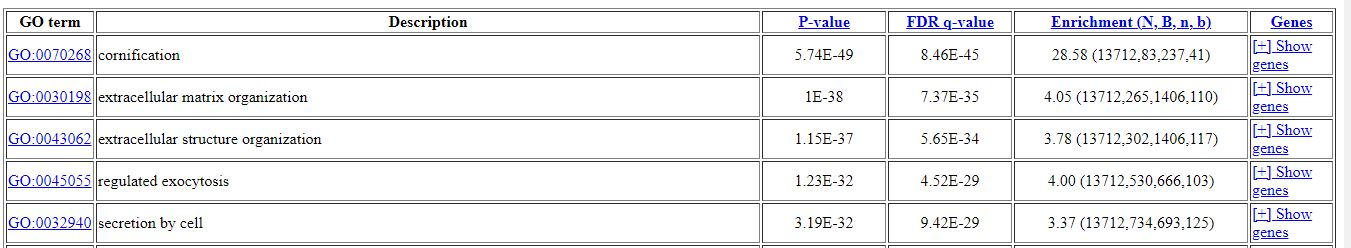
The most relevat is the cornification process. So we can posit that hispanic or latino people with Skin cancer have over express genes involved in the cornification process.

Making list of genes for the specific pattern in descending order.

In [28]:
## pattern selection
patternToPrint = 1;

def printGeneExpression(patternToPrint):
    genes = list()
    expression = list()
    # make two lists with all of the protein names and the associated expression
    for i in range(0, len(data.columns)):
        genes.append(data.columns[i])
        expression.append(v[patternToPrint,:][i])
        #print(str(proteinToGene[data.columns[i]]) + ' ' + str(v[patternToPrint,:][i]))

    # turn the lists into a dataframe
    d = {'gene':genes, 'expression':expression}
    patternExpression = pd.DataFrame(d, columns=['gene','expression'])
    
    #We then sort the genes by the expression value
    pattern = patternExpression.sort_values(by=['expression'],ignore_index=True, ascending=True)
    
    # We then print that list in order of expression so we can copy-paste into gorilla
    for gene in pattern.iloc[:,0]:
        print(gene)
        
            

#printGeneExpression(2)

Pasting the list into GOrilla we get the following results for process. 
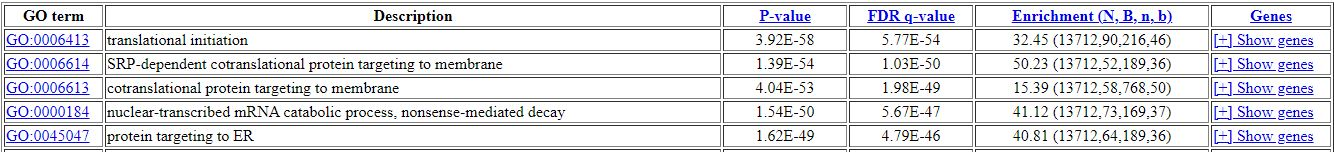
The most relevat is the translational initiation process. So we can posit that hispanic or latino people with skin cancer have under express genes involved in the translational initiation process.